In [2]:
import math
import numpy as np
import matplotlib.pyplot as pl
from pylab import rcParams
rcParams['figure.figsize'] =  16,12

fB = 32e9                                 #Baudrate
T = 1/fB                                  #Tiempo entre simbolos
M = 8                                     #Factor de sobre muestreo
fs = M*fB                                 #Sample rate

beta = 0.15                               #factor de rolloff 0<=beta<=1
L = 20                                    #cantidad de tabs?
t = np.arange(-L,L,1./M)*T

n_delay_filter = L*M

n_symbols = 1000

def gen_filter():
    return np.sinc(t/T)*np.cos(np.pi*beta*t/T)/(1-4*(beta**2)*(t/T)**2)

gn = gen_filter()

In [3]:
def gen_freq_swep():
    Omega =  np.arange(0,1,1./2**8)*np.pi
    N = 1000
    H_mag=[]
    H_fase=[]
    for omega in Omega:
        xn = [np.exp(np.complex(0,omega*n)) for n in range(N)]
        yn = np.convolve(xn,gn)
        H_mag.append(np.abs(yn[N/2]))
        H_fase.append(np.angle(yn[N/2]*np.conj(xn[N/2-n_delay_filter])))
    return Omega,H_mag,H_fase
Omega,H_mag,H_fase=gen_freq_swep()

In [4]:
def gen_input():
    
    ak = 2*np.random.randint(2,size=n_symbols)-1
    xn = np.zeros(n_symbols*M)
    xn[::M]=ak
    return xn

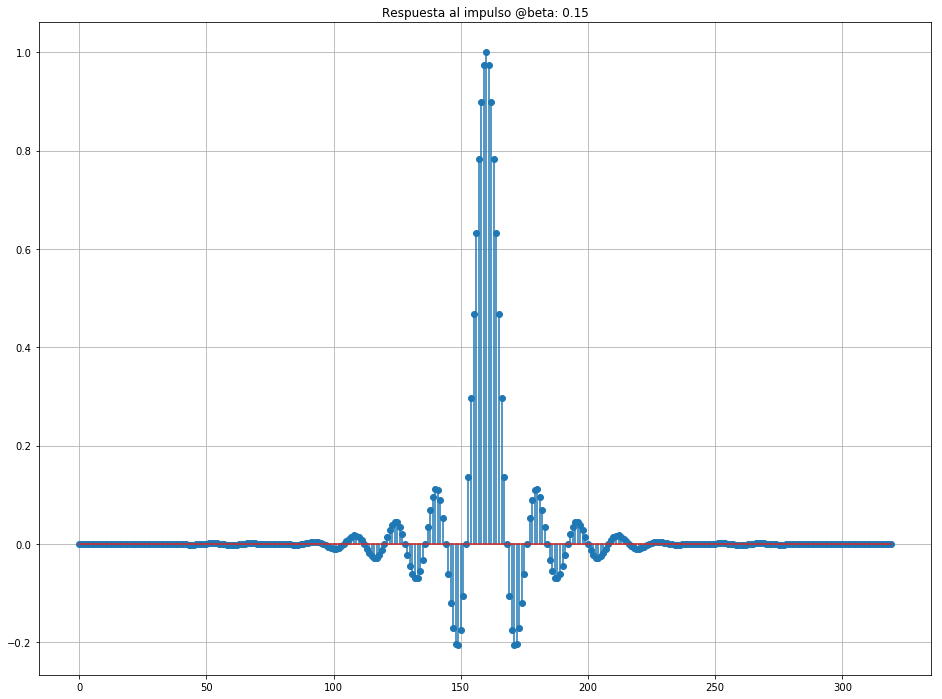

In [5]:
def plot_delta_response():
    pl.stem(gn)
    pl.title("Respuesta al impulso @beta: "+str(beta))
    pl.grid(True)

pl.figure()
plot_delta_response()
pl.show()

def plot_freq_response():
    pl.subplot(2,1,1)
    pl.plot(Omega/np.pi,H_mag);
    pl.title('Magnitud');
    pl.ylabel('$\|H\|$')
    pl.xlabel('$\Omega/\pi$');
    pl.grid()
    pl.subplot(2,1,2) 
    pl.plot(Omega/np.pi,H_fase);
    pl.title('Fase');
    pl.ylabel('angle(H)')
    pl.xlabel('$\Omega/\pi$');
    pl.grid(True)
    
def plot_eye(sn):
    
    d = 5; #Delay para centrar el ojo
    #pl.hold(True)
    for m in range( 2*L,n_symbols-(2*L+1)):
        sn_p = sn[m*M+d-1:m*M+d+M];
        pl.plot(range(-M/2,M/2+1),sn_p,'b')

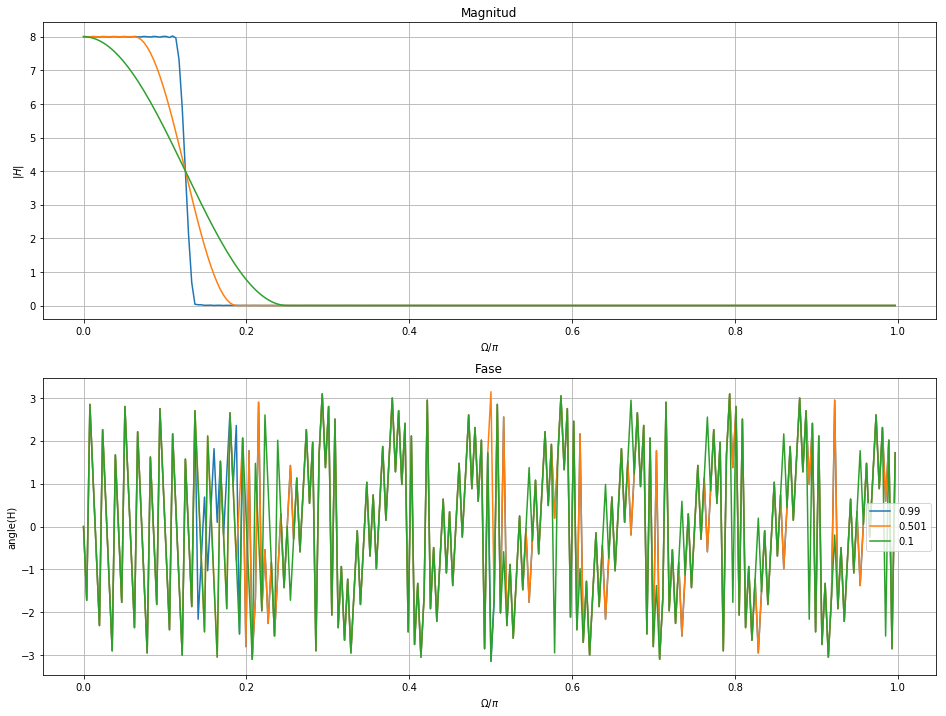

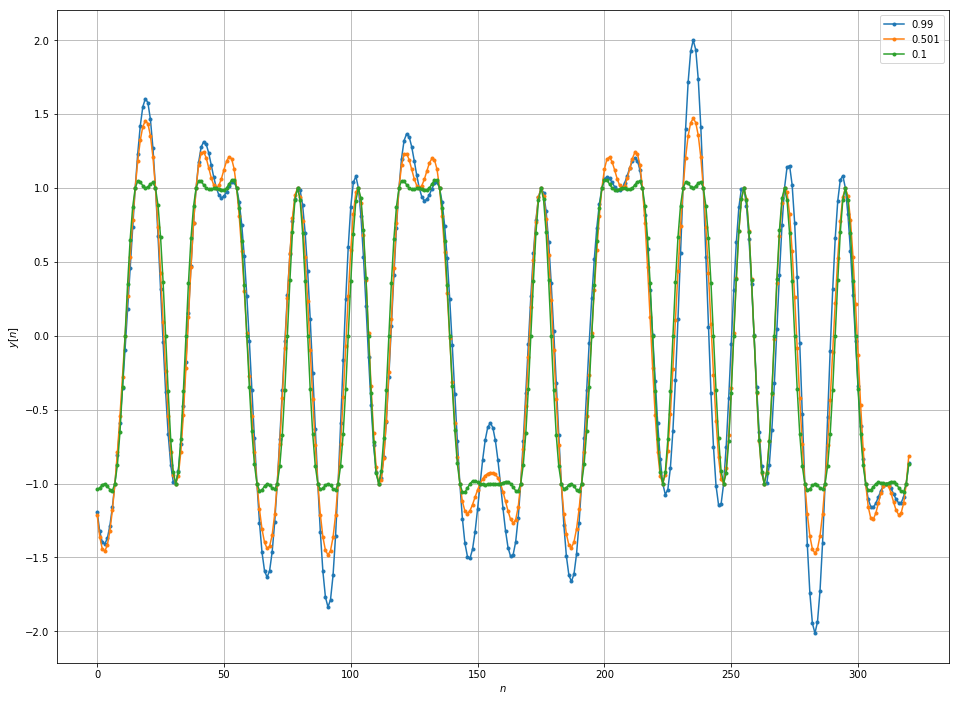

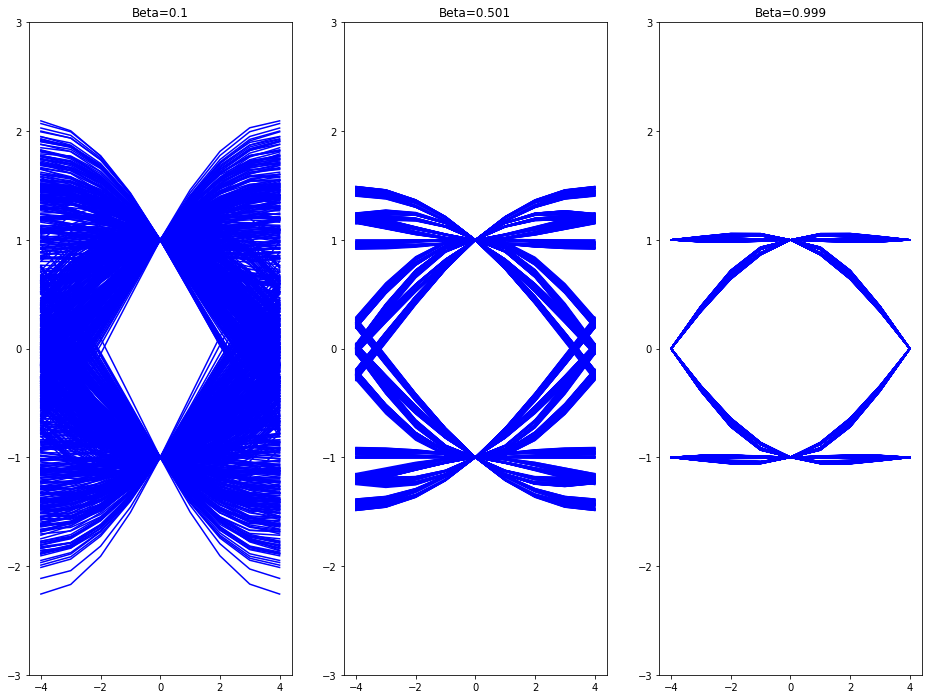

In [6]:
xn = gen_input()
i=1
for beta in [0.1,0.501,0.999]:
    gn = gen_filter()
    Omega,H_mag,H_fase=gen_freq_swep()
    
    pl.figure(1)
    plot_freq_response()
    #pl.figure()
    #plot_delta_response()

    yn = np.convolve(xn,gn)
    pl.figure(2)
    pl.plot(yn[(2*L*M+1):(2*L*M+1)*2],'.-');
    pl.ylabel('$y[n]$')
    pl.xlabel('$n$');
    pl.grid(True)
    
    pl.figure(3)
    pl.subplot(1,3,i)
    pl.ylim([-3,3])
    pl.title("Beta="+str(beta))
    i=i+1
    plot_eye(yn)
    
pl.figure(1)
pl.legend(["0.99","0.501","0.1"])
pl.figure(2)
pl.legend(["0.99","0.501","0.1"])
pl.show()